# How to read EBAS NASA Ames file with pyaerocom

- Either, find files that are available in the provided database, as explained in 
[HOWTO_find_EBAS_files](./HOWTO_find_EBAS_files.ipynb), OR:
- Download (and unzip) the NASA Ames files (.nas) you need from [EBAS database](http://ebas.nilu.no/) (shown below)

In [1]:
import pyaerocom as pya

In [2]:
ls EBAS_FILES/

NO0042G.20050101000000.20120101000000.aws.wind_speed.met.1y.1h.NO01L_NO42_aws_10m.NO01L_cup_anemometer..nas


### Pick the file and put parse it into the `EbasNasaAmesFile` object to read it

In [3]:
fpath = 'EBAS_FILES/' + 'NO0042G.20050101000000.20120101000000.aws.wind_speed.met.1y.1h.NO01L_NO42_aws_10m.NO01L_cup_anemometer..nas'

In [4]:
filedata = pya.io.EbasNasaAmesFile(fpath)
print(filedata)

Pyaerocom EbasNasaAmesFile
--------------------------

num_head_lines: 52
num_head_fmt: 1001
data_originator: Aas, Wenche
sponsor_organisation: NO01L, Norwegian Institute for Air Research, NILU, Atmosphere and Climate Department, Instituttveien 18, , 2007, Kjeller, Norway
submitter: Hjellbrekke, Anne
project_association: EMEP NILU
vol_num: 1
vol_totnum: 1
ref_date: 2005-01-01T00:00:00
revision_date: 2012-01-01T00:00:00
freq: 0.041667
descr_time_unit: days from file reference point
num_cols_dependent: 3
mul_factors (list, 3 items): ['1.00', '1.00', '1.00']
vals_invalid (list, 3 items): ['1000', '1000', '10.00']
descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=3, 
   EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, flag_col=3, 
   EbasColDef: name=wind_speed, unit=m/s, is_var=True, is_flag=False, fl

The data has 4 columns and 8760 timestamps. All attributes can be accessed via `.` or `[]`.

In [5]:
filedata['station_longitude']

'11.88668'

**Note:** as you can see, numerical metadata like longitude, etc. is not converted into floating point but kept as string! You can do:

In [6]:
float(filedata['station_longitude'])

11.88668

### Information about each data column in the file

The NASA Ames files have multiple columns of data (here 4), in order to find the columns you need you can check the `var_defs` attr., which is a list with column information where the index corresponds to the index of the data column.

In [7]:
filedata.var_defs

[EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=3, ,
 EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, flag_col=3, ,
 EbasColDef: name=wind_speed, unit=m/s, is_var=True, is_flag=False, flag_col=3, ,
 EbasColDef: name=numflag wind_speed, unit=no unit, is_var=False, is_flag=True, flag_col=None, ]

E.g. as you can see, the 3rd column (index=2) contains wind speed data:

In [8]:
COL_WINDSPEED = 2

### The actual table data is stored as 2D numpy array under `data` 

**NOTE**: order of indices in data are: ROW, COL

So to get the windspeed column data:

In [9]:
wind_data = filedata.data[:, COL_WINDSPEED]
wind_data

array([0.9, 0.7, 1.2, ..., 1.8, 1.6, 2.2])

### Time stamps are available via `time_stamps` attr (as `numpy.datetime64` objects, i.e. ready for analysis)

In [10]:
filedata.time_stamps

array(['2005-01-01T00:30:00', '2005-01-01T01:29:59',
       '2005-01-01T02:29:59', ..., '2005-12-31T21:30:00',
       '2005-12-31T22:29:59', '2005-12-31T23:29:59'],
      dtype='datetime64[s]')

### Now plot timeseries of windspeed data

In [11]:
import pandas as pd

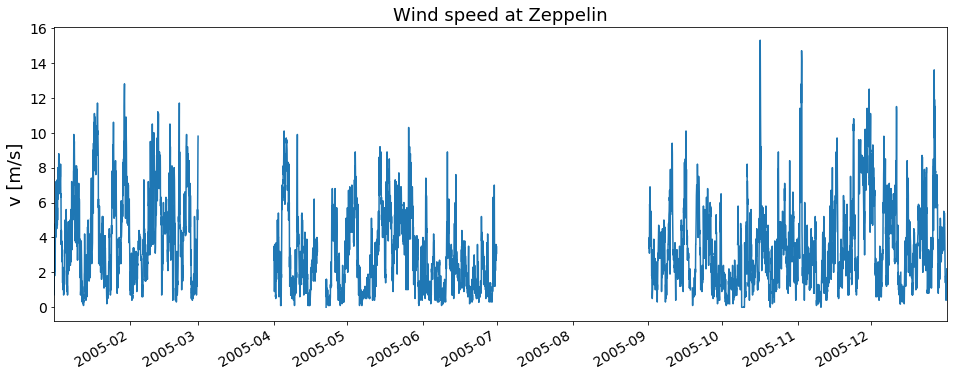

In [12]:
wind_tseries = pd.Series(wind_data, filedata.time_stamps)
ax = wind_tseries.plot(figsize=(16,6), title='Wind speed at Zeppelin');
ax.set_ylabel('v [{}]'.format(filedata.var_defs[COL_WINDSPEED].unit));